In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [94]:
data = np.random.multivariate_normal((0, 0), [[0.8, 0.05], [0.05, 0.7]], 100)
data2 = np.random.multivariate_normal((2, 2), [[0.8, 0.05], [0.05, 0.7]], 100)
x = np.concatenate([data[:, 0],data2[:, 0]])
y = np.concatenate([data[:, 1],data2[:, 1]])
xmin, xmax = -3, 5
ymin, ymax = -3, 5

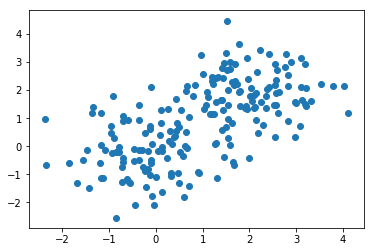

In [95]:
plt.scatter(x, y)

In [96]:
min(x), max(x)

(-2.3748116178640117, 4.10561195125124)

In [97]:
# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

In [98]:
positions = np.vstack([xx.ravel(), yy.ravel()])
positions.shape

(2, 10000)

In [99]:
values = np.vstack([x, y])
values.shape

(2, 200)

In [100]:
kernel = st.gaussian_kde(values)
kernel([0, 0])

array([0.07409772])

In [101]:
f = np.reshape(kernel(positions).T, xx.shape)
f.shape

(100, 100)

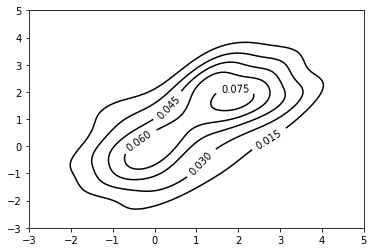

In [102]:
fig = plt.figure()
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# Contourf plot
# cfset = ax.contourf(xx, yy, f, cmap='Blues')
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
# Contour plot
cset = ax.contour(xx, yy, f, colors='k')
# # # Label plot
ax.clabel(cset, inline=1, fontsize=10)
# ax.set_xlabel('Y1')
# ax.set_ylabel('Y0')

plt.show()

In [106]:
from mpl_toolkits.mplot3d import axes3d

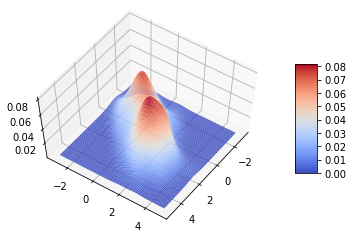

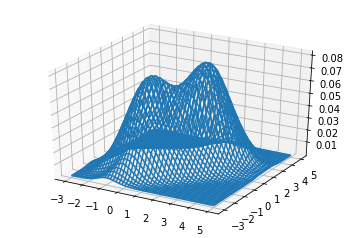

In [121]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.contour3D(xx, yy, f, 50, cmap='binary')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1,
                cmap='coolwarm', edgecolor='none')


# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(60, 35)

fig = plt.figure()
ax = plt.axes(projection='3d')
w = ax.plot_wireframe(xx, yy, f)


## Identify contour lines

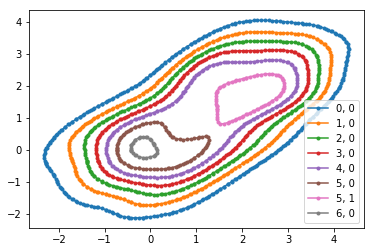

In [73]:
plt.figure()
for j in range(len(cset.allsegs)):
    for ii, seg in enumerate(cset.allsegs[j]):
        plt.plot(seg[:,0], seg[:,1], '.-', label=f'{j}, {ii}')
plt.legend()

Use histogram 2d to get the areas with the highest surface

(array([[ 1.,  1.,  4.,  5.,  2.,  2.,  0.,  0.,  0.,  0.],
        [ 0.,  3.,  3.,  7.,  5.,  1.,  1.,  1.,  1.,  0.],
        [ 0.,  1.,  5.,  3., 11.,  3.,  1.,  0.,  1.,  0.],
        [ 0.,  2.,  3., 10., 13.,  3.,  4.,  1.,  0.,  0.],
        [ 0.,  1.,  3.,  5.,  4.,  7.,  5.,  7.,  1.,  1.],
        [ 0.,  0.,  0.,  2.,  1.,  7.,  4.,  6.,  1.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  5.,  9.,  8.,  2.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  2.,  9.,  2.,  2.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.]]),
 array([-1.46507024, -0.86030501, -0.25553977,  0.34922546,  0.95399069,
         1.55875593,  2.16352116,  2.76828639,  3.37305163,  3.97781686,
         4.5825821 ]),
 array([-2.5794441 , -1.88957966, -1.19971522, -0.50985078,  0.18001366,
         0.8698781 ,  1.55974254,  2.24960699,  2.93947143,  3.62933587,
         4.31920031]),
 <matplotlib.image.AxesImage at 0x1c740805cc0>)

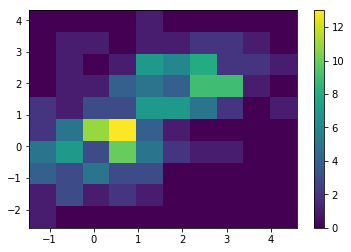

In [91]:
h =plt.hist2d(x, y)
plt.colorbar(h[3])
h